In [31]:
import os
import glob
from datetime import datetime
from concurrent import futures

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web

import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

import seaborn as sns
import matplotlib.pyplot as plt


List of S & P stocks could be read from its Wiki page.

In [6]:
def get_s_and_p_list():
    """ list of s_anp_p companies 
    
    input: url of the Wikipedia page to get list of stocks"""
        
    # get updated list of s_and_p stocks
    # Ignore SSL certificate errors for https
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE

    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

    try:
        html = urllib.request.urlopen(url, context=ctx).read()
    except:
        print("*** Error in retrieval")

    soup = BeautifulSoup(html, 'html.parser')

    table = soup.find('table')
    df_spy = pd.read_html(str(table), header = 0)[0]
    return list(df_spy.Symbol)

Each stock daily trends can be doanloaded rom the below link.

In [16]:
# download a specific stock data
# and save each stock in a seperate .csv file

def download_stock(stock):
    """ try to query the iex for a stock, if failed note with print """
    try:
        print(stock)
        stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
        stock_df['Name'] = stock
        output_name = 'stocks_data/{}_data.csv'.format(stock) #stock + '_data.csv'
        stock_df.to_csv(output_name)        
#         all_stocks = pd.concat(all_stocks, stock_df)
    except:
        bad_names.append(stock)
        print('bad: %s' % (stock))

In [17]:
if __name__ == '__main__':

    """ set the download window """
    now_time = datetime.now()
    start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
    all_stocks = pd.DataFrame()
    s_and_p = get_s_and_p_list()  
    # removing dot form stock name to prevent bad_name errors
    s_and_p = [x.replace(".","") for x in s_and_p]
    
    bad_names =[] #to keep track of failed queries

    """here we use the concurrent.futures module's ThreadPoolExecutor
        to speed up the downloads buy doing them in parallel 
        as opposed to sequentially """

    #set the maximum thread number
    max_workers = 50

    workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
    with futures.ThreadPoolExecutor(workers) as executor:
        res = executor.map(download_stock, s_and_p)


    """ Save failed queries to a text file to retry """
    if len(bad_names) > 0:
        with open('failed_queries.txt','w') as outfile:
            for name in bad_names:
                outfile.write(name+'\n')

    #timing:
    finish_time = datetime.now()
    duration = finish_time - now_time
    minutes, seconds = divmod(duration.seconds, 60)
    print('getSandP_threaded.py')
    print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
    #The threaded script took 0 minutes and 31 seconds to run.

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSSANTM

AON
AOS
APA
AAPL
AMAT
APTV
ADMANET

AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BKBAX

BDX
BRKB
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
bad: BRKB
AVGO
BR
BFB
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CERN
bad: BFB
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CCI
CSXCMI
CVS

DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOVDOW

DTE
DUK
DRE
DD
DXCEMN

ETNEBAY

ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EFXEQIX

EQR
ESS
EL
ETSY
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRTFDX

FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHSFOXAFOX


BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HAL
HBI
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRLHST

HWM
HP

In [13]:
# Merge  all csv files to one for all stocks
# chaging directory to merge csv files
owd = os.getcwd()
os.chdir("stocks_data/")

extension = 'csv'
output_filename = "all_s_and_p_data.csv"
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
if output_filename in all_filenames: all_filenames.remove(output_filename)
# all_filenames
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv(output_filename, index=False)#, encoding='utf-8-sig')
# retruning to previous direcotry
os.chdir(owd)
s_and_p_data = pd.read_csv('stocks_data/all_s_and_p_data.csv', parse_dates = ['Date'], index_col = 'Date')

__Comaping 4 major tech stocks__

In [26]:
major_tech = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] 
# df_compare = pd.DataFrame(columns = major_tech)
df_compare = pd.DataFrame()
for name in major_tech:
    df_compare[name] = s_and_p_data[s_and_p_data.Name == name]['Adj Close']#.pct_change()
df_compare_change = df_compare.pct_change().dropna()

These stocks are highly correlated as they are in teh same area. Finding correlation between these stocks and other stoks and using deep learning algorithm might be able to predict other stocks from these or vise versa.

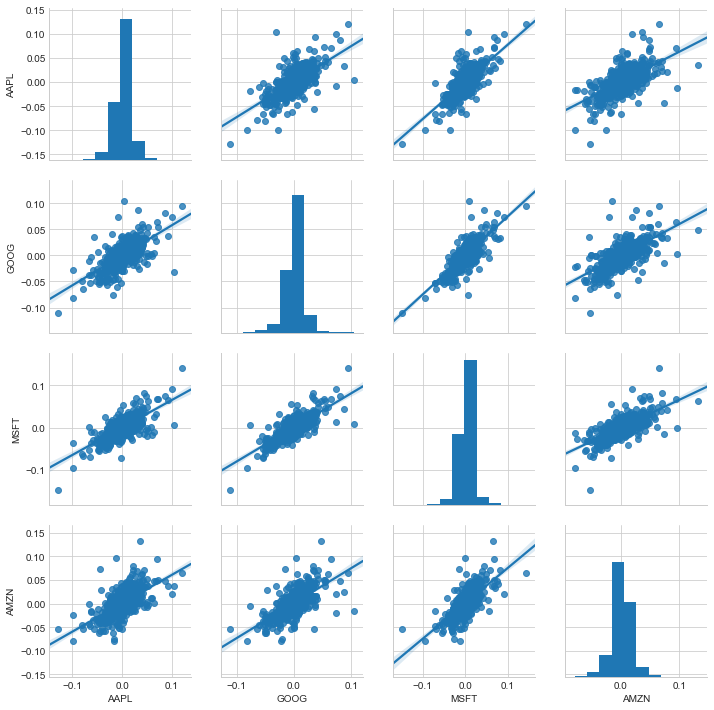

In [27]:
sns.set_style('whitegrid')
# sns.jointplot('GOOG', 'GOOG', df_compare_change, kind='scatter', color='seagreen')

sns.pairplot(df_compare_change, kind='reg')

Also, observing the correlations of stocks over the year could be a route map to have a guess of future of stocks.

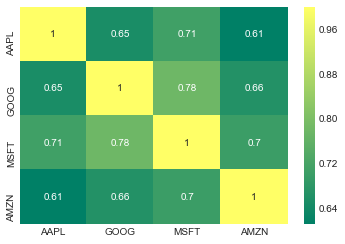

In [33]:
sns.heatmap(df_compare_change.corr(), annot=True, cmap='summer')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


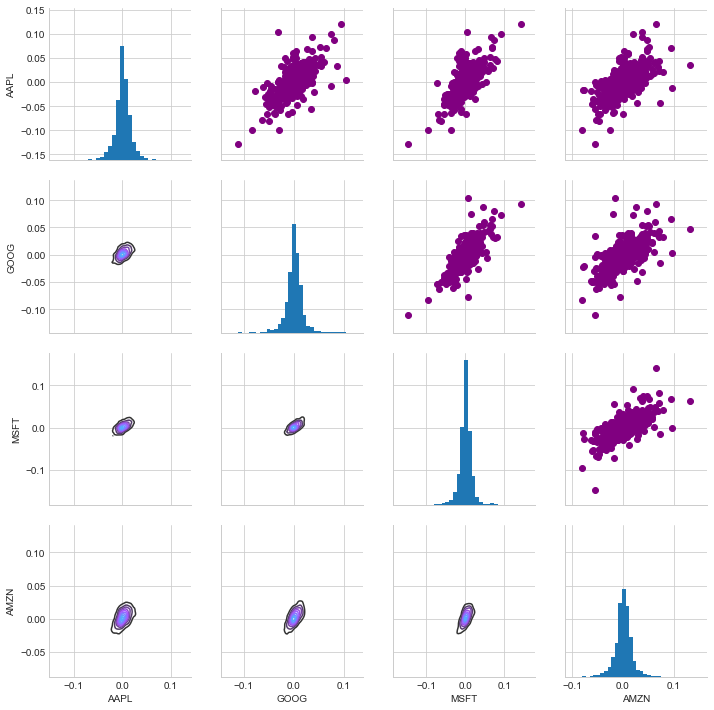

In [32]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df_compare_change.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Finally, what we want to do is using the time series of these stocks and predict their future. an dalso use close stocks in the area fo comapny predicts its future. 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


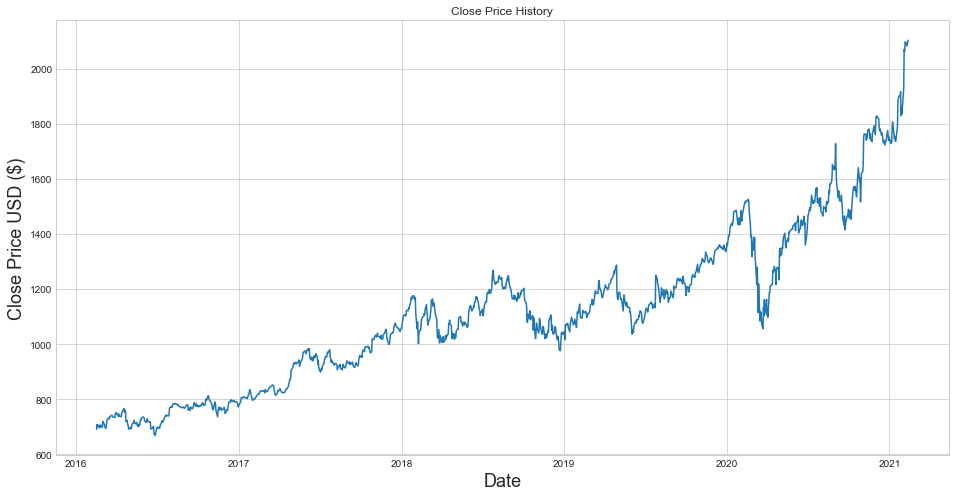

In [37]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(s_and_p_data[s_and_p_data.Name=='GOOG']['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()